X_train_raw shape: (59999, 784)
y_train_raw shape: (59999,)
X_test_raw shape: (9999, 784)
y_test_raw shape: (9999,)
X_train shape: (59999, 28, 28, 1)
y_train shape: (59999,)
X_test shape: (9999, 28, 28, 1)
y_test shape: (9999,)


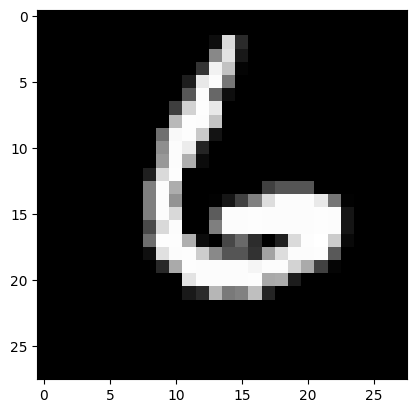

Loading existing model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0384
Test Accuracy: 99.09%


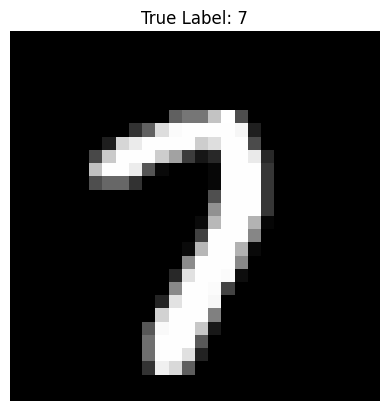

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Model prediction probabilities: [[4.5593388e-06 2.5775784e-05 5.5496519e-05 1.8909411e-04 3.9785994e-10
  5.0295651e-10 2.1232697e-12 9.9972087e-01 1.9890894e-07 3.8963672e-06]]
Predicted label: 7


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_csv = r'D:\BTech\SoC\MNIST_CSV\mnist_train.csv'
test_csv = r'D:\BTech\SoC\MNIST_CSV\mnist_test.csv'

train_data = pd.read_csv(train_csv)
test_data = pd.read_csv(test_csv)

print("X_train_raw shape:", train_data.iloc[:, 1:].shape)
print("y_train_raw shape:", train_data.iloc[:, 0].shape)
print("X_test_raw shape:", test_data.iloc[:, 1:].shape)
print("y_test_raw shape:", test_data.iloc[:, 0].shape)

X_train = train_data.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = train_data.iloc[:, 0]

X_test = test_data.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = test_data.iloc[:, 0]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

index = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[index].squeeze(), cmap='gray')
plt.show() 

model_file = 'digit_recognizer_cnn.h5'

if os.path.exists(model_file):
    print("Loading existing model...")
    model = load_model(model_file)
else:
    print("Training new model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax') 
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(X_train, y_train, epochs=5, batch_size=64)
    model.save(model_file)
    print("Model trained and saved.")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

index2 = random.randint(0, len(X_test) - 1)
plt.imshow(X_test[index2].squeeze(), cmap='gray')
plt.title(f"True Label: {y_test.iloc[index2]}")
plt.axis('off')
plt.show()

y_pred = model.predict(X_test[index2].reshape(1, 28, 28, 1))
print("Model prediction probabilities:", y_pred)
print("Predicted label:", np.argmax(y_pred))